# General Report

## Setup

In [12]:
from matplotlib.colors import ListedColormap 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from lib import formatting as sd_formatting
import pyodbc 
import toml
import config_logging
import logging
import urllib.request
import pandas as pd
import colorcet as cc
import numpy as np

log = logging.getLogger(__name__)
external_ip = urllib.request.urlopen('https://ident.me').read().decode('utf8')

properties = toml.load("./.streamlit/secrets.toml")

database_props = properties[properties["database"]["flavour"]] 


## Reload

In [13]:
### Set up

%load_ext autoreload
%autoreload 3

from data.daos import dao_facade_local as dao_fac
from lib import db_tools as db_tools
from lib import masters_data_analytics_lib as mlib
from lib import stats as stats

db_conn = None
db_conn = db_tools.get_db_conn(database_props)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2022-09-03 13:09:14,625 [INFO] lib.db_tools: DATABASE CONNECTIVITY


## Search Criteria

In [14]:
city      = "London"
post_code = ""

borough   = "Islington"
ward_name = "Holloway"

## 27% Black African Carribean at Borough Level
borough   = "Lewisham"
ward_name = "Bellingham"

borough   = "Islington"
ward_name = "Holloway"

## 27% Black African Carribean at Borough Level
borough   = "Lewisham"
ward_name = "Bellingham"

# borough   = "Barking and Dagenham"
# ward_name = "Abbey"

## FEMALE
### HIGH RATION
# borough   = "Croydon"
# ward_name = "New Addington North"

# borough   = "Merton"
# ward_name = "Dundonald"


year_from = 2013
year_to   = 2022

#post_code = "SW20 8ED"

search_term = {
    "city"      : city
  , "borough"   : borough
  , "ward_name" : ward_name
  , "post_code" : post_code
  , "year_from" : year_from
  , "year_to"   : year_to
}


# REPORT GENERATION

2022-09-03 13:09:15,072 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-03 13:09:15,074 [DEBUG] root: retrieving post_code
2022-09-03 13:09:16,378 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-03 13:09:16,380 [DEBUG] root: Retrieving population min max year
2022-09-03 13:09:16,431 [DEBUG] managers.sections.sd_report_section_02_Population: population orig_year_to    :2022
2022-09-03 13:09:16,433 [DEBUG] managers.sections.sd_report_section_02_Population: population search_year_to  :2011
2022-09-03 13:09:16,434 [DEBUG] managers.sections.sd_report_section_02_Population: {'year_from': 2011, 'year_to': 2011, 'borough': 'Lewisham', 'ward_name': 'Bellingham'}
2022-09-03 13:09:16,434 [DEBUG] root: retrieving london population year


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:09:18,381 [DEBUG] managers.sections.sd_report_section_02_Population: min_borough_ward_density_pph:7.766666666666667
2022-09-03 13:09:18,382 [DEBUG] managers.sections.sd_report_section_02_Population: max_borough_ward_density_pph:293.08796992481206
2022-09-03 13:09:18,383 [DEBUG] managers.sections.sd_report_section_02_Population: [7.766666666666667, 65.83092731829575, 123.89518796992483, 181.95944862155395, 240.02370927318302, inf]
2022-09-03 13:09:18,427 [DEBUG] managers.sections.sd_report_section_02_Population: min_borough_density_pph:44.87246023949719
2022-09-03 13:09:18,429 [DEBUG] managers.sections.sd_report_section_02_Population: max_borough_density_pph:215.0413051899063
2022-09-03 13:09:18,503 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-03 13:09:18,504 [DEBUG] root: Retrieving ethnicity min max year
2022-09-03 13:09:18,537 [DEBUG] root: ethnicity_ratio_average_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:09:20,275 [DEBUG] root: ethnicity_ratio_by_borough_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:09:21,285 [DEBUG] root: ethnicity_ratio_by_borough_ward_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:09:21,583 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-03 13:09:21,584 [DEBUG] root: Retrieving general health min max year
2022-09-03 13:09:21,617 [DEBUG] managers.sections.sd_report_section_04_General_Health: health orig_year_to    :2022
2022-09-03 13:09:21,618 [DEBUG] managers.sections.sd_report_section_04_General_Health: health search_year_to  :2021
2022-09-03 13:09:21,619 [DEBUG] root: general_health_ratio_average_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:09:22,604 [DEBUG] root: genearl_health_ratio_by_borough_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:09:23,405 [DEBUG] root: general_health_ratio_by_borough_ward_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:09:23,621 [DEBUG] managers.sections.sd_report_section_04_General_Health: Ward more so Green
2022-09-03 13:09:23,623 [DEBUG] managers.sections.sd_report_section_04_General_Health: Borough more so Green
2022-09-03 13:09:23,624 [DEBUG] managers.sections.sd_report_section_04_General_Health: Ward more so Green
2022-09-03 13:09:23,624 [DEBUG] managers.sections.sd_report_section_04_General_Health: Borough more so Green
2022-09-03 13:09:23,671 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-03 13:09:23,672 [DEBUG] root: Retrieving qualifications min max year
2022-09-03 13:09:23,704 [DEBUG] managers.sections.sd_report_section_05_Education:    MAX_YEAR  MIN_YEAR
0      2011      2011
2022-09-03 13:09:23,708 [DEBUG] managers.sections.sd_report_section_05_Education: education_year_min:2011
2022-09-03 13:09:23,709 [DEBUG] managers.sections.sd_report_section_05_Education: education_year_max:2011
2022-09-03 13:09:23,709 [DEBUG] managers.sections.sd_report_section_05_Education: educat

C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:09:25,528 [DEBUG] root: education_ratio_by_borough_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:09:26,529 [DEBUG] root: education_ratio_by_borough_ward_years
2022-09-03 13:09:26,732 [INFO] lib.db_tools: DATABASE CONNECTIVITY


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\core\arrays\categorical.py:2747: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


2022-09-03 13:09:26,734 [DEBUG] root: Retrieving earnings min max year
2022-09-03 13:09:26,753 [DEBUG] managers.sections.sd_report_section_06_Earnings:    MAX_YEAR  MIN_YEAR
0      2021      2010
2022-09-03 13:09:26,755 [DEBUG] managers.sections.sd_report_section_06_Earnings: earnings orig_year_to    :2022
2022-09-03 13:09:26,757 [DEBUG] managers.sections.sd_report_section_06_Earnings: earnings search_year_to  :2021
2022-09-03 13:09:26,758 [DEBUG] root: retrieving uk earnings year
2022-09-03 13:09:26,784 [DEBUG] root: Retrieving Crime Ranked By Borough Years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:09:27,372 [DEBUG] managers.sections.sd_report_section_06_Earnings: [[24405.0, 25000.0, 26323.0, 28430.0, 29044.0, 27105.0, 30372.0, 31114.0, 29162.0]]
2022-09-03 13:09:27,373 [DEBUG] managers.sections.sd_report_section_06_Earnings: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
2022-09-03 13:09:27,376 [DEBUG] managers.sections.sd_report_section_06_Earnings: slope:735.7166666666667
2022-09-03 13:09:29,516 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-03 13:09:29,517 [DEBUG] root: Retrieving crime min max year
2022-09-03 13:09:29,536 [DEBUG] managers.sections.sd_report_section_07_Crime: 2001
2022-09-03 13:09:29,537 [DEBUG] managers.sections.sd_report_section_07_Crime: 2022
2022-09-03 13:09:29,539 [DEBUG] managers.sections.sd_report_section_07_Crime: crime orig_year_to    :2022
2022-09-03 13:09:29,541 [DEBUG] managers.sections.sd_report_section_07_Crime: crime search_year_to  :2022
2022-09-03 13:09:29,541 [DEBUG] managers.sections.sd_report_section_07_Crime: QRY

C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:10:04,856 [DEBUG] managers.sections.sd_report_section_07_Crime: QRY Ended
2022-09-03 13:10:04,857 [DEBUG] root: city_population
2022-09-03 13:10:04,879 [DEBUG] root: city_population


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:10:05,321 [DEBUG] managers.sections.sd_report_section_07_Crime: [[0.0796, 0.07498, 0.082, 0.08291, 0.08245, 0.08436, 0.09304, 0.08735, 0.08321, 0.03484]]
2022-09-03 13:10:05,322 [DEBUG] managers.sections.sd_report_section_07_Crime: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
2022-09-03 13:10:05,324 [DEBUG] managers.sections.sd_report_section_07_Crime: slope:-0.0017344242424242426
2022-09-03 13:10:05,818 [DEBUG] matplotlib.axes._base: top of Axes not in the figure, so title not moved
2022-09-03 13:10:05,922 [DEBUG] matplotlib.axes._base: top of Axes not in the figure, so title not moved
2022-09-03 13:10:05,955 [DEBUG] matplotlib.axes._base: top of Axes not in the figure, so title not moved
2022-09-03 13:10:05,996 [DEBUG] matplotlib.axes._base: top of Axes not in the figure, so title not moved
2022-09-03 13:10:06,024 [DEBUG] matplotlib.axes._base: top of Axes not in the figure, so title not moved
2022-09-03 13:10:06,744 [DEBUG] root: Retrieving Crim Major c

C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:10:24,267 [DEBUG] root: Retrieving Crim Major categories for a ward top 5 for borough in year


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-03 13:10:25,445 [DEBUG] selenium.webdriver.remote.remote_connection: POST http://localhost:63671/session {"capabilities": {"firstMatch": [{}], "alwaysMatch": {"browserName": "chrome", "pageLoadStrategy": "normal", "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--headless", "-no-sandbox", "--disable-dev-shm-usage"]}}}, "desiredCapabilities": {"browserName": "chrome", "pageLoadStrategy": "normal", "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--headless", "-no-sandbox", "--disable-dev-shm-usage"]}}}
2022-09-03 13:10:25,447 [DEBUG] urllib3.connectionpool: Starting new HTTP connection (1): localhost:63671
2022-09-03 13:10:26,494 [DEBUG] urllib3.connectionpool: http://localhost:63671 "POST /session HTTP/1.1" 200 792
2022-09-03 13:10:26,495 [DEBUG] selenium.webdriver.remote.remote_connection: Finished Request
2022-09-03 13:10:26,496 [DEBUG] managers.sd_map_manager: Browser is loading ./reports/generation/images/REPORT_TYPE_01_GENERAL_map_London_Le

'./reports/generation/documents//REPORT_TYPE_01_GENERAL_sd_general_report_template_01.docx'

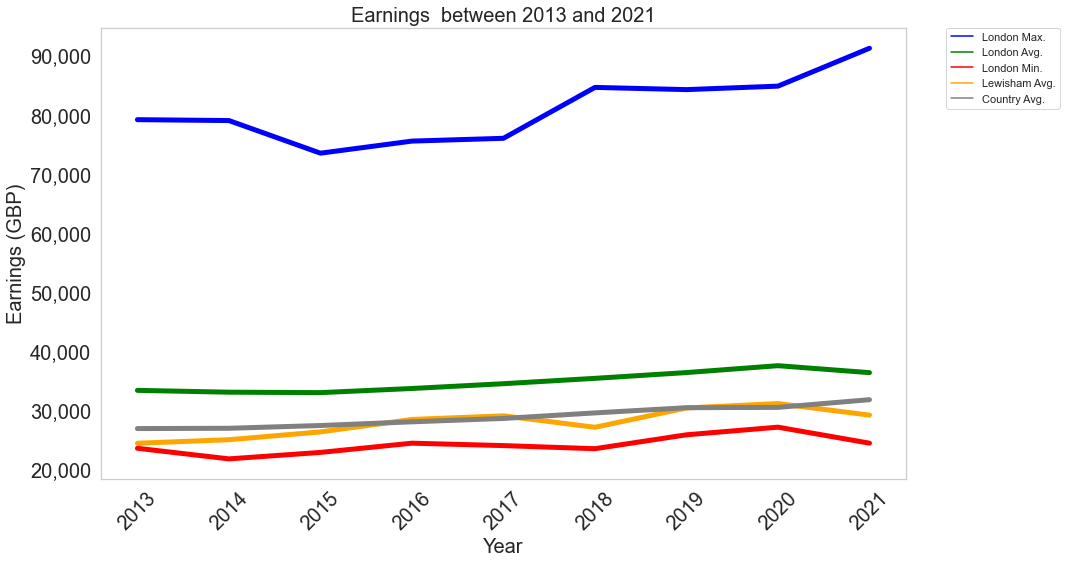

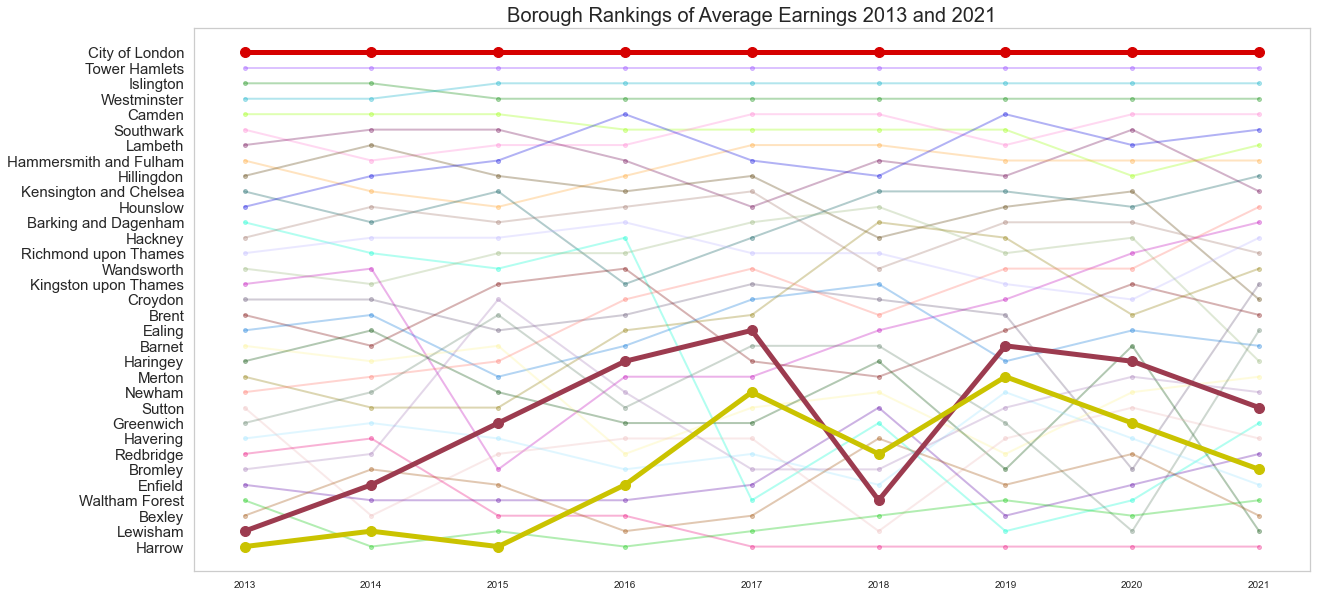

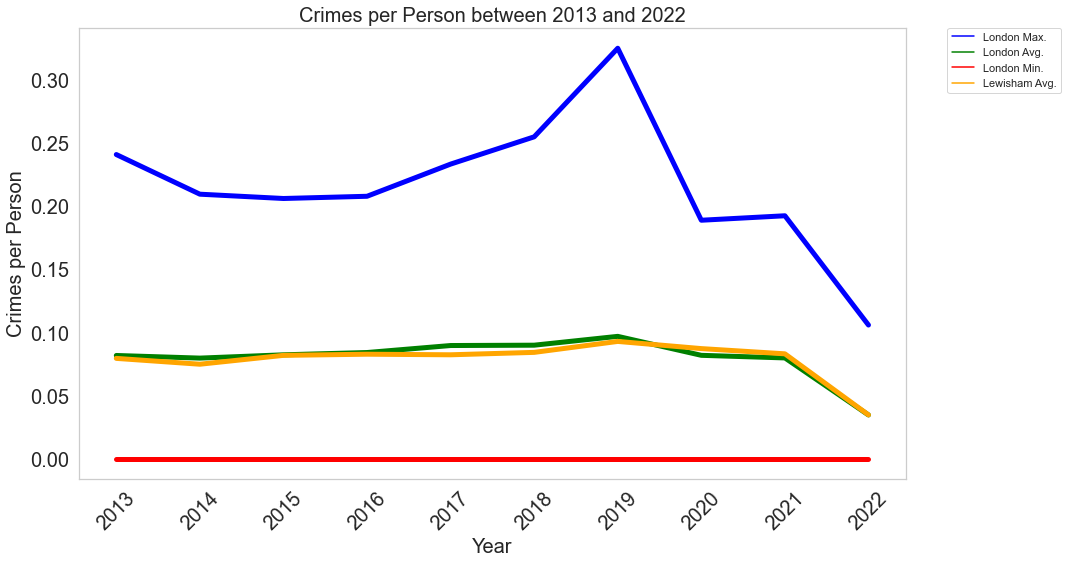

2022-09-03 13:11:00,909 [DEBUG] matplotlib.axes._base: top of Axes not in the figure, so title not moved
2022-09-03 13:11:01,001 [DEBUG] matplotlib.axes._base: top of Axes not in the figure, so title not moved
2022-09-03 13:11:01,030 [DEBUG] matplotlib.axes._base: top of Axes not in the figure, so title not moved
2022-09-03 13:11:01,067 [DEBUG] matplotlib.axes._base: top of Axes not in the figure, so title not moved
2022-09-03 13:11:01,094 [DEBUG] matplotlib.axes._base: top of Axes not in the figure, so title not moved


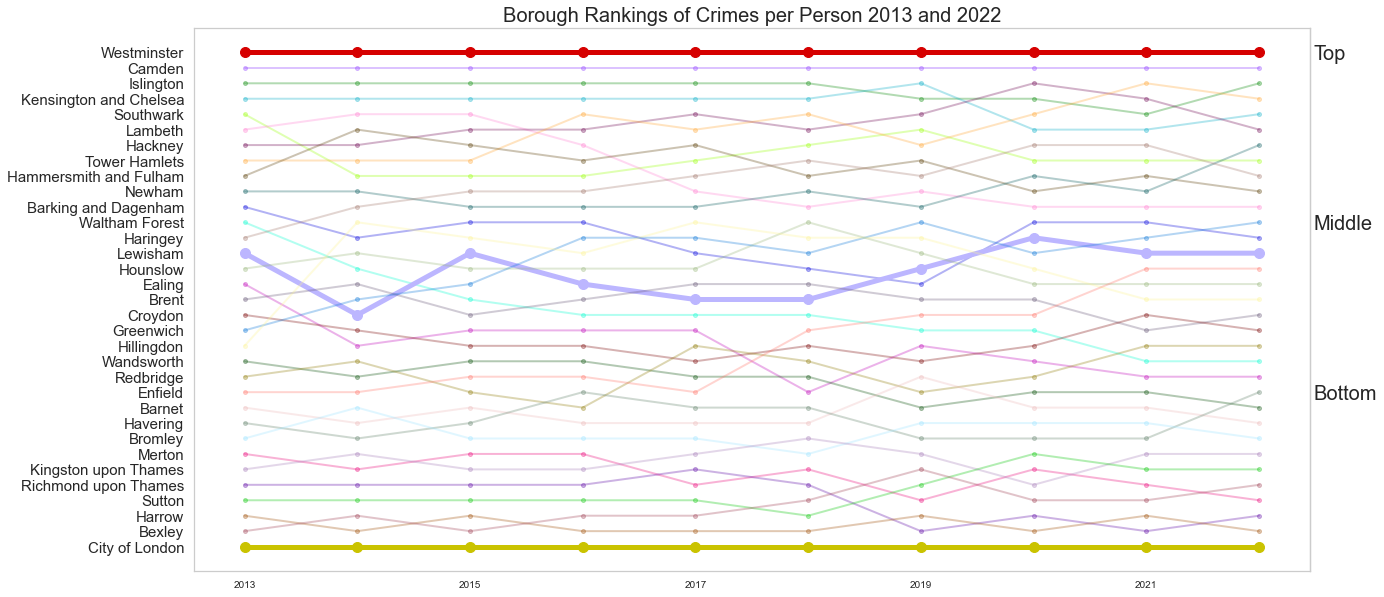

In [15]:
from managers import sd_report_type_general as report_general_man

session_id = "REPORT_TYPE_01_GENERAL"
template_processor_file_name = "./reports/processors/sd_general_report_template_processor.json"
report_option = "Full Report"

## Create the report context
report_context = {}
report_context["template_processor_file_name"] = template_processor_file_name
report_context["report_option"] = report_option
report_context["include_mapZ"] = False

report_general_man.generate_report(session_id
                                 , search_term
                                 , report_context
                                 , properties)
